# Load input CSV files and run them through PALS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pathlib
import pickle
import pandas as pd

sys.path.append('/Users/anamaria/git/PALS/')

In [3]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/'

osp = MAC

In [4]:
from pals.pimp_tools import get_pimp_API_token_from_env, PIMP_HOST, download_from_pimp
from pals.feature_extraction import DataSource
from pals.PLAGE import PLAGE
from pals.ORA import ORA
from pals.GSEA import GSEA
from pals.common import *

2020-11-17 18:05:27.937 | WARNING  | pals.reactome:get_neo4j_driver:14 - Using a default neo4j server: bolt://localhost:7687
2020-11-17 18:05:27.938 | WARNING  | pals.reactome:get_neo4j_driver:19 - Using a default neo4j username or password: neo4j
2020-11-17 18:05:27.962 | WARNING  | pals.reactome:get_neo4j_driver:27 - Failed to connect to graph database: Failed to establish connection to IPv4Address(('127.0.0.1', 7687)) (reason [Errno 61] Connection refused)
2020-11-17 18:05:27.967 | WARNING  | pals.reactome:<module>:34 - Driver initialisation failed. PALS will run without Reactome support.


# Analysis

### Load data

In [174]:
osp = '/Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/'
intensity_csv = osp+'pals_analysis/intensity.csv'
annotation_csv =osp+'pals_analysis/annotation.csv'
sd = pd.read_csv(osp+'pals_analysis/sample_description.csv')

experimental_design =  {
    'comparisons': [{'case': 'infected', 'control': 'control', 'name':'infected/control'}],
    'groups': {'infected': [], 'control': []}
}    

for case in experimental_design['groups']:
    if case == 'infected':
        experimental_design['groups'][case] = [s for s in sd[sd['Condition'] == 'infected']['Sample Name']]
    if case == 'control':
        experimental_design['groups'][case] = [s for s in sd[sd['Condition'] == 'control']['Sample Name']]

In [175]:
int_df, annotation_df, groups = load_data(intensity_csv, annotation_csv)

2020-11-16 17:49:15.880 | DEBUG    | pals.common:load_data:165 - Loaded 1084 x 69 peak intensities from /Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/pals_analysis/intensity.csv
2020-11-16 17:49:15.891 | DEBUG    | pals.common:load_data:166 - Loaded groups: {'control': ['KM_10.mzXML', 'KM_4.mzXML', 'KM_1.mzXML', 'KM_16.mzXML', 'KM_13.mzXML', 'KM_19.mzXML', 'KM_7.mzXML', 'C7_2.mzXML', 'C10_2.mzXML', 'C18_2.mzXML', 'C2_2.mzXML', 'C12_2.mzXML', 'C5_2.mzXML', 'C8_2.mzXML', 'C17_2.mzXML', 'C20_2.mzXML', 'C19_2.mzXML', 'C14_2.mzXML', 'C3_2.mzXML', 'C11_2.mzXML', 'C6_2.mzXML', 'C1_2.mzXML', 'C16_2.mzXML', 'C4_2.mzXML', 'C13_2.mzXML', 'C9_2.mzXML', 'C1.mzXML', 'C7.mzXML', 'C6_r.mzXML', 'C3.mzXML', 'C2.mzXML', 'C9.mzXML', 'C5.mzXML', 'C4.mzXML', 'C10.mzXML'], 'infected': ['KM_9.mzXML', 'KM_3.mzXML', 'KM_12.mzXML', 'KM_18.mzXML', 'KM_15.mzXML', 'KM_21.mzXML', 'KM_6.mzXML', 'VL7.mzXML', 'VL17.mzXML', 'VL16.mzXML', 'VL10.mzXML', 'VL11.mzXML', 'VL1.mzXML', 'VL14.mzXML', 'VL15.mzXML', 'VL5.mz

In [176]:
samples = np.array(int_df.columns)

In [177]:
annotation_df

,entity_id
peak_id,
n36,C05984
n36,C01089
n36,C03197
n36,C06001
n36,C00989
n1480,C04717
n1480,C14827
n493,C00064
n493,C05100


### PALS analysis using KEGG database exported from PiMP

In [182]:
ds = DataSource(int_df, annotation_df, experimental_design, DATABASE_PIMP_KEGG)

2020-11-16 17:50:04.035 | DEBUG    | pals.feature_extraction:__init__:43 - Using PiMP_KEGG as database
2020-11-16 17:50:04.037 | DEBUG    | pals.loader:load_data:42 - Loading /Users/anamaria/git/PALS/pals/data/PiMP_KEGG.json.zip
2020-11-16 17:50:04.120 | DEBUG    | pals.feature_extraction:__init__:56 - Mapping pathway to unique ids
2020-11-16 17:50:04.145 | DEBUG    | pals.feature_extraction:__init__:70 - Creating dataset to pathway mapping
2020-11-16 17:50:04.310 | DEBUG    | pals.feature_extraction:__init__:98 - Computing unique id counts


In [178]:
ds = DataSource(int_df, annotation_df, experimental_design, DATABASE_REACTOME_KEGG, 
                reactome_species=REACTOME_SPECIES_HOMO_SAPIENS, reactome_metabolic_pathway_only=True)

2020-11-16 17:49:23.777 | DEBUG    | pals.feature_extraction:__init__:43 - Using COMPOUND as database
2020-11-16 17:49:23.780 | DEBUG    | pals.loader:load_data:84 - Loading /Users/anamaria/git/PALS/pals/data/reactome/metabolic_pathways/COMPOUND/Homo sapiens.json.zip
2020-11-16 17:49:23.987 | DEBUG    | pals.feature_extraction:__init__:56 - Mapping pathway to unique ids
2020-11-16 17:49:23.991 | DEBUG    | pals.feature_extraction:__init__:70 - Creating dataset to pathway mapping
2020-11-16 17:49:24.080 | DEBUG    | pals.feature_extraction:__init__:98 - Computing unique id counts


In [183]:
plage = PLAGE(ds)

In [184]:
pathway_df = plage.get_pathway_df()

2020-11-16 17:50:09.060 | DEBUG    | pals.feature_extraction:change_zero_peak_ints:308 - Setting the zero intensity values in the dataframe
2020-11-16 17:50:09.075 | DEBUG    | pals.feature_extraction:change_zero_peak_ints:310 - 0
2020-11-16 17:50:09.151 | DEBUG    | pals.feature_extraction:standardize_intensity_df:277 - Scaling the data across the sample: zero mean and unit variance
2020-11-16 17:50:09.232 | DEBUG    | pals.PLAGE:get_plage_activity_df:90 - Mean values of the rows in the DF is [ 0. -0.  0. ...  0. -0.  0.]
2020-11-16 17:50:09.233 | DEBUG    | pals.PLAGE:get_plage_activity_df:91 - Variance in the rows of the DF is [1. 1. 1. ... 1. 1. 1.]
2020-11-16 17:50:09.417 | DEBUG    | pals.PLAGE:set_up_resample_plage_p_df:102 - Calculating plage p-values with resampling
2020-11-16 17:50:09.419 | DEBUG    | pals.PLAGE:set_up_resample_plage_p_df:109 - Comparison infected/control
2020-11-16 17:50:09.421 | DEBUG    | pals.PLAGE:set_up_resample_plage_p_df:117 - Resampling 0/1000
2020-1

In [190]:
pd.set_option('display.max_rows', 500)
pathway_df.sort_values('infected/control p-value', ascending=True, inplace=True)
#pathway_df
paths = pathway_df[pathway_df['tot_ds_F'] >= 7]

In [195]:
pd.DataFrame(paths.index).to_csv(osp+'pathview_analysis/maps.csv')

In [57]:
pname = 'R-HSA-71240'
cids = []
annot = []
logfc = []
for cid in ds.dataset_pathways_to_row_ids[pname]:
    if cid not in cids:
        
        for kegg in (get_peak_annotations(cid)):
            cids.append(cid)
            annot.append(kegg)
            logfc.append(get_logfc(cid))
    

In [58]:
df = pd.DataFrame([cids, annot, logfc], ["cid", "annot", "logfc"]).transpose().sort_values(by = 'logfc')
df.to_csv(osp+'pals_analysis/'+pname+'.csv')

In [26]:
group = int_df.loc[cids]

## Further analysis

In [28]:
import seaborn as sns
sns.clustermap(group, center=0, cmap='vlag', col_colors=group_colours,
                       col_cluster=False, linewidths=0.75, cbar_pos=(0.1, 0.05, 0.05, 0.18))

NameError: name 'group_colours' is not defined

In [ ]:
group_intensities = intensities_df.loc[members][all_samples]
group_colours = pd.Series(all_groups, index=group_intensities.columns).map(group_lut)
group_colours.name = 'groups'


In [ ]:
#plot heatmap
g = sns.clustermap(group_intensities, center=0, cmap='vlag', col_colors=group_colours,
                       col_cluster=False, linewidths=0.75, cbar_pos=(0.1, 0.05, 0.05, 0.18))
plt.suptitle('Formula Hits in Pathways', y=0.85)

# draw group legend
for group in used_groups:
        g.ax_col_dendrogram.bar(0, 0, color=group_lut[group], label=group, linewidth=0)
    g.ax_col_dendrogram.legend(loc="right")

    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

    # render plot
    st.pyplot()

    data = []
    for idx in members:
        formula = ','.join(dataset_row_id_to_unique_ids[idx])
        row = [idx, formula]
        data.append(row)
    data_df = pd.DataFrame(data, columns=['Row Index', 'Formula Annotations'])

In [149]:
with open(osp+'positive_mode/samples/peakinfolist.dict', 'rb') as file:
    peakinfolist_positive_new = pickle.load(file)

In [111]:
with open(osp+'positive_mode/samples/peakinfolist.dict', 'wb') as handle:
    pickle.dump(peakinfolist_positive_new, handle)

In [110]:
for peak in peakinfolist_positive_new:
    old_peak = get_peak(peak.cid)
    peak.mm_annotation = old_peak.mm_annotation
    peak.mm_pathway = old_peak.mm_pathway
    peak.mm_kegg_id = old_peak.mm_kegg_id
    peak.std_annotation = old_peak.std_annotation
    peak.std_kegg_id = old_peak.std_kegg_id
    peak.spectra = old_peak.spectra
    peak.adducts = old_peak.adducts
    peak.best_ms2_match_adduct = old_peak.best_ms2_match_adduct
    peak.ms2_annotation = old_peak.ms2_annotation
    peak.ms2_kegg_id = old_peak.ms2_kegg_id
    
    

In [4]:
MNET_PATH = '/Users/anamaria/git/molnet/code/'
sys.path.append(MNET_PATH)
sys.path.append('..')
import peakinfo
with open(osp+'positive_mode/samples/peakinfolist.dict', 'rb') as file:
    peakinfolist_positive = pickle.load(file)
with open(osp+'negative_mode/samples/peakinfolist.dict', 'rb') as file:
    peakinfolist_negative = pickle.load(file)
    


In [114]:
def get_peak_annotations(cid):
    if cid.startswith('n'):
        for peak in peakinfolist_negative:
            if peak.cid == cid:
                return peak.get_possible_kegg_ids()
    else:
        for peak in peakinfolist_positive_new:
            if peak.cid == cid:
                return peak.get_possible_kegg_ids()

In [113]:
def get_logfc(cid):
    if cid.startswith('n'):
        for peak in peakinfolist_negative:
            if peak.cid == cid:
                return peak.logfc
    else:
        for peak in peakinfolist_positive_new:
            if peak.cid == cid:
                return peak.logfc

In [112]:
def get_peak(cid):
    if cid.startswith('n'):
        for peak in peakinfolist_negative:
            if peak.cid == cid:
                return peak
    else:
        for peak in peakinfolist_positive_new:
            if peak.cid == cid:
                return peak

In [116]:
#added intensities to peakinfo
for cid in int_df.index:
    intensities = {}
    length = len(int_df.loc[cid])
    for i in range(length):
        intensities[int_df.loc[cid].index[i]] = int_df.loc[cid][i]
    peak = get_peak(cid)
   
    peak.add_intensities(intensities)


In [153]:
keggs = []
samples = []
logfcs = []
for peak in peakinfolist_negative:
    if peak.get_possible_kegg_ids() is not None:
        for kegg in peak.get_possible_kegg_ids():
            keggs.append(kegg)
            samples.append(peak.intensities)
            logfcs.append(peak.logfc)
for peak in peakinfolist_positive_new:
    if peak.get_possible_kegg_ids() is not None:
        for kegg in peak.get_possible_kegg_ids():
                keggs.append(kegg)
                samples.append(peak.intensities)
                logfcs.append(peak.logfc)


In [6]:
for peak in peakinfolist_positive:
    if peak.mz <= 112.20 and peak.mz >= 112.10:
        print(peak)

peak p5645: 112.12015998654249, 3.371696277842031 

                p-val: 0.0, 0.0 

                 

                 

                 

                 

                 

                
peak p5646: 112.12011528015137, 26.890669408071922 

                p-val: 0.0, 0.0 

                 

                 

                 

                 

                 

                
peak p5647: 112.12014452616373, 38.55018277891167 

                p-val: 0.0, 0.0 

                 

                 

                 

                 

                 

                
peak p5648: 112.12013778686523, 20.513335371337263 

                p-val: 0.0, 0.0 

                 

                 

                 

                 

                 

                
peak p5649: 112.12018839518231, 5.058848090819798 

                p-val: 0.0, 0.0 

                 

                 

                 

                 

                 

                
peak p56

In [163]:
df = pd.DataFrame(samples)

In [154]:
df = pd.DataFrame(logfcs)

In [164]:
df.index = keggs

In [165]:
sample_description = pd.read_csv(osp+'sample_description.csv', index_col=0)

In [166]:
control = list(sample_description[sample_description['Condition'] == 'control'].index)
infected = list(sample_description[sample_description['Condition'] == 'infected'].index)

In [167]:
allnames = []
allnames = [*control,*infected]


In [168]:
df = df[allnames]

In [169]:
df.to_csv(osp+'pathview_analysis/kegg_intensities.csv', na_rep = 0)

In [151]:
df

,KM_10.mzXML,KM_4.mzXML,KM_1.mzXML,KM_16.mzXML,KM_13.mzXML,KM_19.mzXML,KM_7.mzXML,C7_2.mzXML,C10_2.mzXML,C18_2.mzXML,...,ZIK6.mzXML,ZIK10.mzXML,ZIK7.mzXML,ZIK1.mzXML,ZIK4.mzXML,ZIK5.mzXML,ZIK9.mzXML,ZIK8.mzXML,ZIK3.mzXML,ZIK2.mzXML
C00037,3.793162e+06,4.047472e+06,3.526951e+06,2.550157e+06,3.119919e+06,3.267440e+06,4.644669e+06,3709077.46,4.182851e+06,3.999162e+06,...,1569276.448,2408481.996,3153086.804,3.233083e+06,2.119470e+06,3402185.008,1.688153e+06,1.860977e+06,2.321284e+06,2875450.767
C05984,1.189739e+07,1.042577e+07,1.391011e+07,9.226508e+06,2.610691e+07,1.314168e+07,1.188354e+07,0.00,0.000000e+00,1.118263e+06,...,4058785.020,4232909.375,4357131.370,4.532948e+06,4.397926e+06,4576894.751,4.363380e+06,4.204267e+06,4.711809e+06,4340988.734
C01089,1.189739e+07,1.042577e+07,1.391011e+07,9.226508e+06,2.610691e+07,1.314168e+07,1.188354e+07,0.00,0.000000e+00,1.118263e+06,...,4058785.020,4232909.375,4357131.370,4.532948e+06,4.397926e+06,4576894.751,4.363380e+06,4.204267e+06,4.711809e+06,4340988.734
C03197,1.189739e+07,1.042577e+07,1.391011e+07,9.226508e+06,2.610691e+07,1.314168e+07,1.188354e+07,0.00,0.000000e+00,1.118263e+06,...,4058785.020,4232909.375,4357131.370,4.532948e+06,4.397926e+06,4576894.751,4.363380e+06,4.204267e+06,4.711809e+06,4340988.734
C06001,1.189739e+07,1.042577e+07,1.391011e+07,9.226508e+06,2.610691e+07,1.314168e+07,1.188354e+07,0.00,0.000000e+00,1.118263e+06,...,4058785.020,4232909.375,4357131.370,4.532948e+06,4.397926e+06,4576894.751,4.363380e+06,4.204267e+06,4.711809e+06,4340988.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C04148,3.062910e+07,2.492181e+06,2.636345e+07,1.879074e+07,1.815678e+06,1.055623e+07,4.750791e+06,28315281.77,6.179113e+06,2.525951e+07,...,0.000,7175338.911,0.000,1.912599e+07,2.093876e+07,0.000,0.000000e+00,1.429123e+07,7.960767e+06,0.000
C05642,3.062910e+07,2.492181e+06,2.636345e+07,1.879074e+07,1.815678e+06,1.055623e+07,4.750791e+06,28315281.77,6.179113e+06,2.525951e+07,...,0.000,7175338.911,0.000,1.912599e+07,2.093876e+07,0.000,0.000000e+00,1.429123e+07,7.960767e+06,0.000
C04092,2.300395e+06,5.835067e+06,7.397894e+06,1.306961e+06,2.284498e+06,9.481450e+06,4.342230e+06,34043180.64,4.302073e+07,5.534188e+07,...,0.000,0.000,0.000,1.579476e+06,1.185900e+06,1064143.535,1.093226e+06,9.547196e+05,0.000000e+00,0.000
C00450,2.300395e+06,5.835067e+06,7.397894e+06,1.306961e+06,2.284498e+06,9.481450e+06,4.342230e+06,34043180.64,4.302073e+07,5.534188e+07,...,0.000,0.000,0.000,1.579476e+06,1.185900e+06,1064143.535,1.093226e+06,9.547196e+05,0.000000e+00,0.000


In [73]:
for i in int_df.loc['p1']:
    print(i)

TypeError: cannot unpack non-iterable float object

In [61]:
for row_ids, row in int_df.iterrows():
    print(row.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [55]:
annotation_df

,entity_id
peak_id,
n36,C05984
n36,C01089
n36,C03197
n36,C06001
n36,C00989
n1480,C04717
n1480,C14827
n493,C00064
n493,C05100


In [ ]:
for row_id,row in int_df:
    if row_id in annotation_df.index:
        new_row_id = 
    

In [55]:
peakinfolist_positive.sort(key = lambda peak: peak.pval, reverse = False)
peakinfolist_negative.sort(key = lambda peak: peak.pval, reverse = False)

peakinfolist_positive_filtered = list(filter(lambda peak: peak.pval, peakinfolist_positive))
peakinfolist_negative_filtered = list(filter(lambda peak: peak.pval, peakinfolist_negative))

In [10]:
with open(os.path.join(osp,'Metabolomics_datasets/metabolites.dict'), 'rb') as file:
    metabolites = pickle.load(file)

In [13]:
peaklist = [*peakinfolist_positive_filtered, *peakinfolist_negative_filtered]
peaklist.sort(key = lambda peak: peak.pval, reverse = False)

In [17]:
def create_dataframe_top_metabolites(peaklist, n = 10):
    cid = []
    logfc = []
    pvals = []
    keggs = []
    annots = []
    mz = []
    rt = []
    stds = []
    for peak in peaklist: 
        
        if peak.get_possible_kegg_ids() is not None and peak.pval<0.05:
            annot = []
            keggs.append(peak.get_possible_kegg_ids())
            cid.append(peak.cid)
            mz.append(peak.mz)
            rt.append(peak.rt)
            logfc.append(peak.logfc)
            pvals.append(peak.pval)
            for j in peak.get_possible_kegg_ids():
                for k in metabolites.values():
                    if k[5] == j:
                        annot.append(k[2])
            annots.append(annot)
            stds.append(peak.is_standard())
    return pd.DataFrame((cid, mz, rt, logfc, pvals, keggs,stds, annots), ("Cid","mz", "rt", "LOGfc", "pval", "kegg", "stds", "annot")).transpose()

In [56]:
df = create_dataframe_top_metabolites(peakinfolist_positive, 50)

In [49]:
[df['stds']

SyntaxError: unexpected EOF while parsing (<ipython-input-49-823f66e40d04>, line 1)

In [7]:
ids = list(df.sort_values(by = 'mz')['Cid'])

In [39]:
ids = list(df.sort_values(by = 'pval')['Cid'])

In [57]:
df.to_csv('/Users/anamaria/Desktop/annotated_metabolites_positive.csv', index = False)

In [20]:
df = pd.read_csv('/Users/anamaria/Desktop/annotated_metabolites.csv')

In [21]:
df

,Cid,mz,rt,LOGfc,pval,kegg,stds,annot
0,n36,85.029555,7.089136,13.223711,1.358169e-11,['C05984' 'C01089' 'C03197' 'C06001' 'C00989'],False,"['2-Hydroxybutyric acid', '(R)-3-Hydroxybutyri..."
1,n1480,311.223299,3.744297,-11.968295,7.509950e-11,['C04717' 'C14827'],False,"['13-L-Hydroperoxylinoleic acid', '9(S)-HPODE']"
2,pp633,148.073458,11.915377,-11.182687,4.917262e-10,['C00418'],False,['Mevalonic acid']
3,n493,145.061996,11.956320,-2.739653,5.344333e-10,['C00064' 'C05100' 'C00819'],False,"['L-Glutamine', 'Ureidoisobutyric acid']"
4,n1436,295.228194,3.334677,2.355998,5.402367e-10,['C01595'],False,['Linoleic acid']
...,...,...,...,...,...,...,...,...
150,n1515,327.233521,3.311692,0.518592,4.333929e-02,['C06429'],False,['Docosahexaenoic acid']
151,n479,144.030357,8.173938,3.474311,4.414631e-02,['C05572' 'C00940'],False,[]
152,pp122,104.070602,10.220390,0.206240,4.518060e-02,['C02356' 'C01026' 'C00334' 'C05145' 'C01205' ...,False,"['L-alpha-Aminobutyric acid', 'Dimethylglycine..."
153,pp3305,129.065846,10.937779,-4.005956,4.539702e-02,['C00906'],False,['Dihydrothymine']


In [269]:
create_dataframe_top_metabolites(peakinfolist_positive_filtered, 20)

,Cid,mz,rt,LOGfc,pval,kegg,annot
0,p633,148.073,11.9154,-11.1827,4.91726e-10,[C00418],[Mevalonic acid]
1,p613,147.076,11.9052,-2.63035,9.50855e-10,"[C00906, C00064, C00047]","[Dihydrothymine, L-Glutamine, L-Lysine]"
2,p3109,905.594,2.99894,-10.2113,1.13536e-09,None,[]
3,p3028,837.618,3.15077,-12.5422,1.73066e-09,None,[]
4,p2989,810.6,3.17127,-1.78123,2.21433e-09,None,[]
5,p2936,782.569,3.20424,-1.7945,3.04248e-09,None,[]
6,p324,126.022,12.2095,-1.04711,3.36958e-09,"[C00245, C00245]","[Taurine, Taurine]"
7,p2938,784.584,3.19568,-1.44978,5.88708e-09,None,[]
8,p425,133.061,10.3339,1.75011,7.12583e-09,"[C02642, C00152]","[Ureidopropionic acid, L-Asparagine]"
9,p2992,812.614,3.17385,-1.64558,8.04659e-09,None,[]


In [10]:
samples_values_positive = pd.read_csv(osp+'/pymz/filtered_samples_log_description.csv', index_col = 0)
samples_values_filled_positive = pd.read_csv(osp+'/pymz/filtered_samples_log_filled_description.csv', index_col = 0).transpose()
samples_values_filled_positive.index = ['p'+cid for cid in samples_values_filled_positive.index]
sample_values_negative = pd.read_csv(osp+'/negative_mode/filtered_samples_log_description.csv', index_col=0)
samples_values_filled_negative = pd.read_csv(osp+'/negative_mode/filtered_samples_log_filled_description.csv', index_col=0).transpose()
samples_values_filled_negative.index = ['n'+cid for cid in samples_values_filled_negative.index]

In [11]:
all_samples_filled = pd.concat((samples_values_filled_positive, samples_values_filled_negative))

In [40]:
filtered_samples_filled = all_samples_filled.loc[ids]

In [41]:
filtered_samples_filled = filtered_samples_filled.astype(float)

In [15]:
plt.figure(figsize=(10,20))
plt.imshow(filtered_samples_filled,aspect='auto')
plt.colorbar()
plt.show()

NameError: name 'plt' is not defined

In [27]:
samples_values_filled_negative = samples_values_filled_negative.transpose()

In [29]:
control = list(samples_values_filled_negative[samples_values_filled_negative['nCondition'] == 'control'].index)
infected = list(samples_values_filled_negative[samples_values_filled_negative['nCondition'] == 'infected'].index)

In [32]:
alls = [*control, *infected]

In [34]:
filtered_samples_filled[alls]

,KM_10.mzXML,KM_4.mzXML,KM_1.mzXML,KM_16.mzXML,KM_13.mzXML,KM_19.mzXML,KM_7.mzXML,C7_2.mzXML,C10_2.mzXML,C18_2.mzXML,...,ZIK6.mzXML,ZIK10.mzXML,ZIK7.mzXML,ZIK1.mzXML,ZIK4.mzXML,ZIK5.mzXML,ZIK9.mzXML,ZIK8.mzXML,ZIK3.mzXML,ZIK2.mzXML
n10,21.854970,21.948590,21.749991,21.282155,21.573078,21.639730,22.147145,21.822629,21.996055,21.931266,...,20.581669,21.199693,21.588334,21.624479,21.015272,21.698031,20.687015,20.827630,21.146492,21.455357
p38,22.594205,22.550861,22.621415,22.131022,21.999412,23.049294,22.534729,24.652698,23.500230,23.384225,...,23.655326,23.631608,23.828942,23.633439,23.626490,24.358025,23.357453,23.755862,23.956140,24.585814
n36,23.504142,23.313651,23.729631,23.137353,24.637929,23.647646,23.502462,20.986679,20.920826,20.092829,...,21.952617,22.013219,22.054948,22.112019,22.068392,22.125938,22.057015,22.003423,22.167850,22.049593
n41,24.087818,24.495622,25.379819,24.104393,24.332154,25.150073,24.370699,25.066688,25.868514,26.241279,...,24.419334,24.671252,23.959236,22.765570,24.524423,24.462331,24.113285,24.145214,23.081924,23.396789
n52,24.058254,24.276260,24.992215,24.004495,24.550780,24.334912,24.277231,24.860146,25.035062,25.631234,...,24.220466,24.346422,24.147074,24.203278,24.359146,24.724082,24.203474,24.062173,24.005190,24.636379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p2664,23.567741,24.698210,24.952370,24.582124,25.575193,23.880999,25.553986,24.654825,25.321652,26.012380,...,22.794547,22.860733,22.520487,22.458969,22.233689,23.443609,23.440273,23.046078,22.036949,23.691891
p2693,25.063146,25.159134,25.774376,25.752323,25.942413,24.717531,26.024301,26.008429,25.369139,25.588141,...,23.775361,23.181681,24.182207,23.607631,23.838708,24.234476,23.256139,23.624676,22.684957,23.860964
p2696,29.986538,30.739065,31.127294,31.324714,31.049078,30.363733,31.057838,31.409408,30.956434,31.609003,...,28.945428,29.200968,29.971764,29.470490,29.478465,29.868541,29.217247,29.038796,28.513798,30.080958
p2727,20.356673,19.562480,19.912910,20.648109,19.934046,19.907758,20.086365,23.091727,20.231521,19.756737,...,18.636830,19.902642,20.409515,20.021774,20.138691,20.711103,19.332222,20.052309,16.795380,21.108067


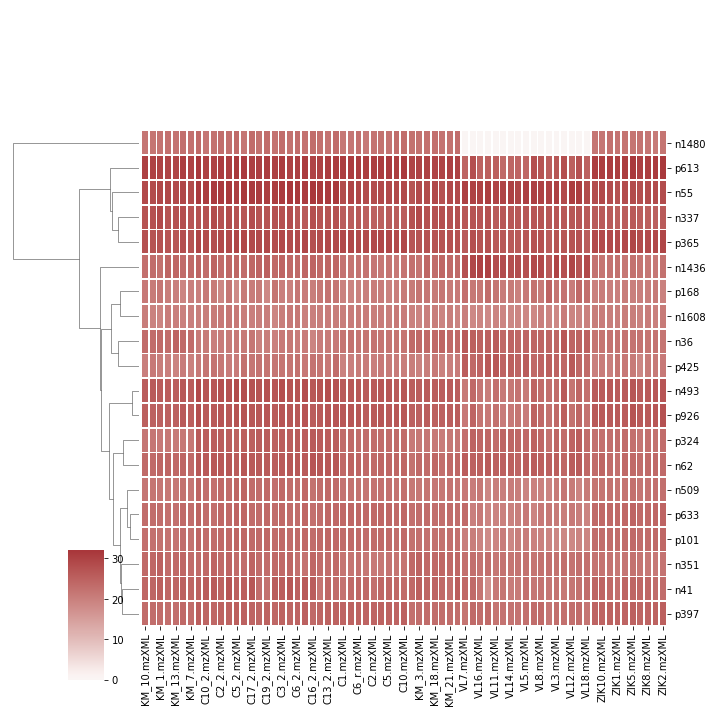

In [46]:
import seaborn as sns
sns.clustermap(filtered_samples_filled[alls].loc[filtered_samples_filled.index[0:20]], center=0, cmap='vlag', 
                       col_cluster=False, linewidths=0.75, cbar_pos=(0.1, 0.05, 0.05, 0.18))

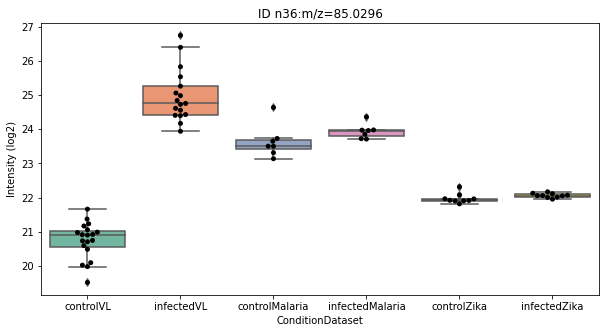

In [295]:
get_peak('n36').plot_boxplots(samples_values_filled_negative)

In [ ]:
with open(os.path.join(osp,'peakinfolist_positive_negative.pi'), 'wb') as handle:
    pickle.dump(peaklist, handle)

In [8]:
sys.path.append('..')
import peakinfo
with open(os.path.join(osp,'peakinfolist_positive_negative.pi'), 'rb') as file:
    peaklist = pickle.load(file)

In [53]:
def get_significant_mz_plot(peaklist):
    
    import matplotlib.pyplot as plt
    from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
    import matplotlib as mpl
    mz = []
    rt = []
    for peak in peaklist:
        if peak.pval<0.05:
            mz.append(peak.mz)
            rt.append(peak.rt)

    fig, ax = plt.subplots()
    ax.plot(rt, mz, '.',color='#ff6961', 
                alpha=0.7)  
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
   
    ax.set_ylabel('m/z')
    ax.set_xlabel('Retention time (min)')
    

In [180]:
def get_mz_plot(peaklist):
    
    import matplotlib.pyplot as plt
    from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
    import matplotlib as mpl
    mz = []
    rt = []
    sigmz = []
    sigrt = []
    for peak in peaklist:
        
        if peak.pval<0.05:
            sigmz.append(peak.mz)
            sigrt.append(peak.rt)
        else:
            mz.append(peak.mz)
            rt.append(peak.rt)
    
    fig, ax = plt.subplots()
    ax.plot(rt, mz, '.',color='#ff6961', 
                alpha=0.6, label = 'Non-significantly modified features')  
    ax.plot(sigrt, sigmz, '.', color='#4393c3', alpha = 0.6, label = 'Significantly modified features')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.legend()
    ax.set_ylabel('m/z')
    ax.set_xlabel('Retention time (min)')
    plt.show()

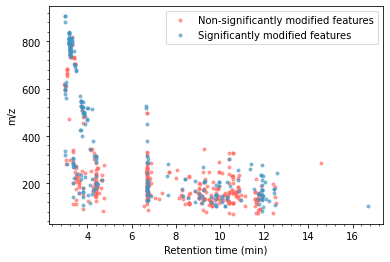

In [151]:
get_mz_plot(peakinfolist_positive_filtered)

In [81]:
def create_bins_by_rt(peaklist, width):
    peaklist.sort(key = lambda peak: peak.rt, reverse = False) 
    lowest_value = peaklist[0].rt*60
    highest_value = peaklist[len(peaklist)-1].rt*60
    n_bins = int((highest_value - lowest_value)/width)
    bins = []
    for i in range(n_bins):
        bins.append((lowest_value+width*i, lowest_value+width*(i+1)))
    return bins

In [132]:
create_bins_by_rt(peaklist, 10)

[(175.675047452941, 185.675047452941),
 (185.675047452941, 195.675047452941),
 (195.675047452941, 205.675047452941),
 (205.675047452941, 215.675047452941),
 (215.675047452941, 225.675047452941),
 (225.675047452941, 235.675047452941),
 (235.675047452941, 245.675047452941),
 (245.675047452941, 255.675047452941),
 (255.675047452941, 265.675047452941),
 (265.675047452941, 275.675047452941),
 (275.675047452941, 285.675047452941),
 (285.675047452941, 295.675047452941),
 (295.675047452941, 305.675047452941),
 (305.675047452941, 315.675047452941),
 (315.675047452941, 325.675047452941),
 (325.675047452941, 335.675047452941),
 (335.675047452941, 345.675047452941),
 (345.675047452941, 355.675047452941),
 (355.675047452941, 365.675047452941),
 (365.675047452941, 375.675047452941),
 (375.675047452941, 385.675047452941),
 (385.675047452941, 395.675047452941),
 (395.675047452941, 405.675047452941),
 (405.675047452941, 415.675047452941),
 (415.675047452941, 425.675047452941),
 (425.675047452941, 435.6

In [182]:
def group_ions_by_rt_bin(peaklist, width = 0.01):
    bins = create_bins_by_rt(peaklist, width)
    peak_bins = {}
    for i in bins:
        for peak in peaklist:
            rt = peak.rt *60
            if rt >= i[0] and rt <= i[1]:
                if i in peak_bins:
                    peak_bins[i].append(peak)
                elif i not in peak_bins:
                    peak_bins[i] = []
                    peak_bins[i].append(peak)
                
    return peak_bins                 

In [183]:
peak_bins = group_ions_by_rt_bin(peakinfolist_positive_filtered)

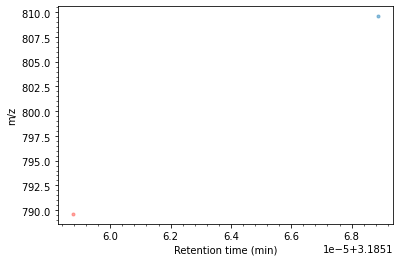

p2953 3.19 789.62 0.214983325639963 None
p2987 3.19 809.59 -8.59564301986815 None


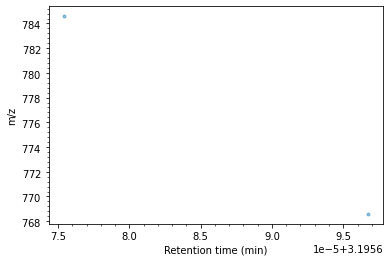

p2938 3.2 784.58 -1.4497776489092902 None
p2915 3.2 768.59 -3.5029282947256406 None


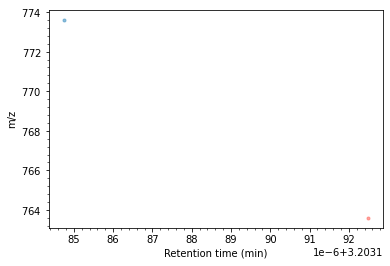

p2925 3.2 773.59 -7.347379735301059 None
p2906 3.2 763.59 2.3436544959025603 None


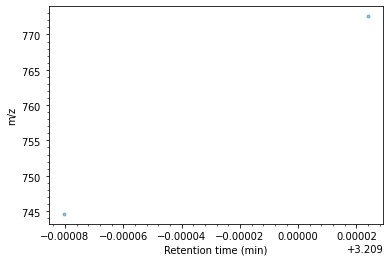

p2878 3.21 744.59 -4.55678741631687 None
p2923 3.21 772.58 -5.6112715565427695 None


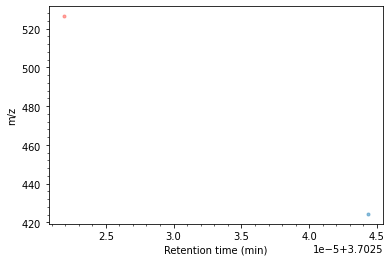

p2729 3.7 526.38 -0.268737144323612 None
p2620 3.7 424.34 -6.879584330156031 ['lneldccrn' 'lnlccrn']


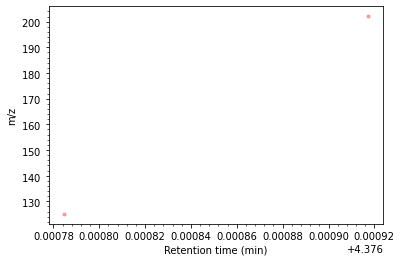

p318 4.38 125.1 -2.2974429908379905 None
p1391 4.38 202.11 -1.06900902689849 ['C05589' 'C00788']


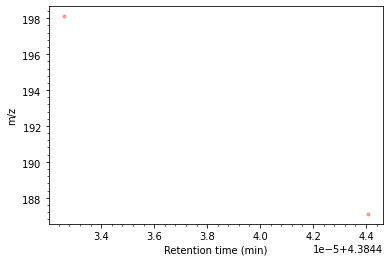

p1340 4.38 198.11 0.5426725013726389 ['C05588']
p1173 4.38 187.1 -0.45377538661287203 None


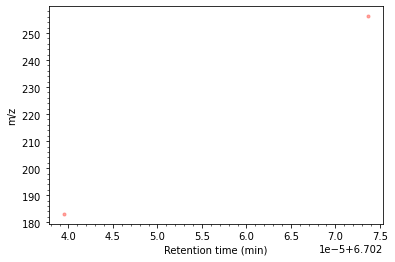

p1118 6.7 183.1 -0.0295543079562464 ['C12448' 'egme']
p1970 6.7 256.17 -0.4651602152526911 None


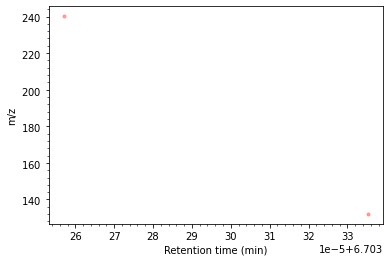

p1832 6.7 240.14 -0.0170690938672458 None
p418 6.7 132.1 -0.0352650335794138 ['C00123' 'C00407']


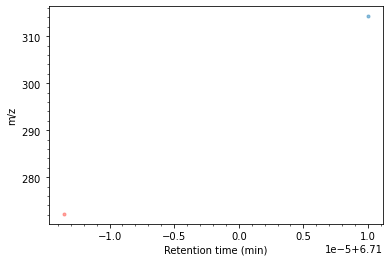

p2094 6.71 272.19 -1.4275170110672302 None
p2372 6.71 314.23 -4.27308111556524 None


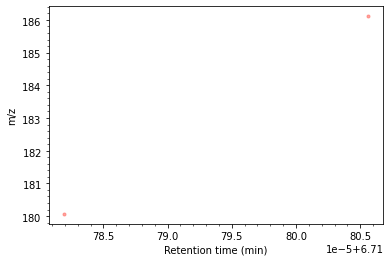

p3642 6.71 180.07 -1.53007627880924 ['C00355' 'C01586']
p1155 6.71 186.11 0.19816685887642999 ['C05587' 'C07453']


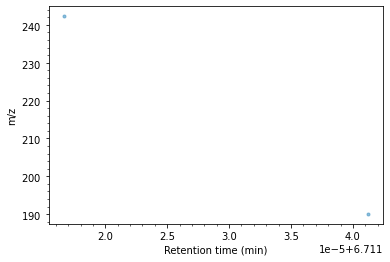

p1844 6.71 242.28 -0.26649901030019396 None
p1221 6.71 190.05 0.41868653481047996 ['C01252']


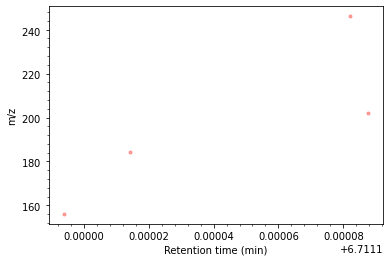

p742 6.71 156.1 0.668923210734182 ['C05589' 'C00788']
p4854 6.71 184.1 -1.31865659767022 ['C05589' 'C00788']
p1889 6.71 246.13 3.3487264033383703 None
p1394 6.71 202.14 -0.21192572134454898 None


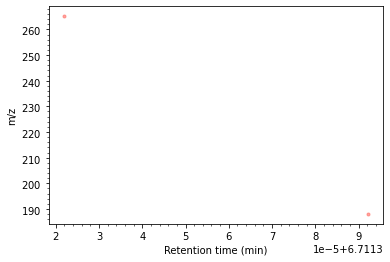

p2038 6.71 265.12 -0.539121773311887 ['C04148' 'C05642']
p1191 6.71 188.09 0.0234341285808348 ['C00547' 'C00314']


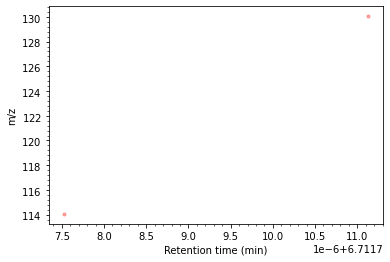

p181 6.71 114.06 -1.9910885650296 ['C03564']
p367 6.71 130.05 0.6458597168445981 ['C02238']


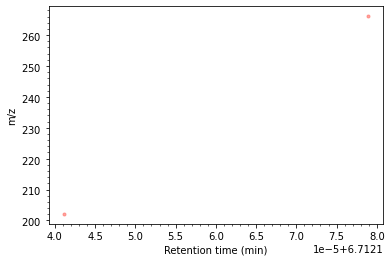

p1389 6.71 202.11 -0.6503643208783461 ['C05589' 'C00788']
p2042 6.71 266.12 -0.539381428504766 ['C04148' 'C05642']


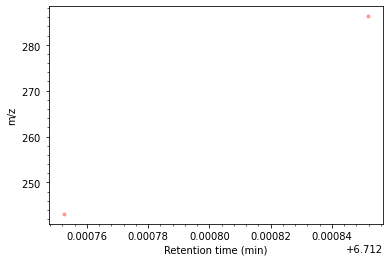

p1850 6.71 243.13 3.6456954077512096 None
p2225 6.71 286.2 -1.56604891525032 None


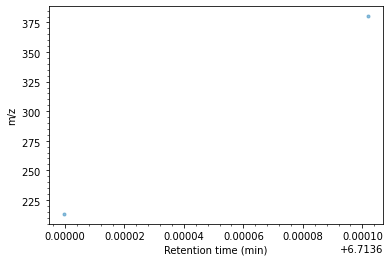

p1526 6.71 213.12 -6.25827129846341 None
p2549 6.71 380.26 -7.99576744906867 ['C06124']


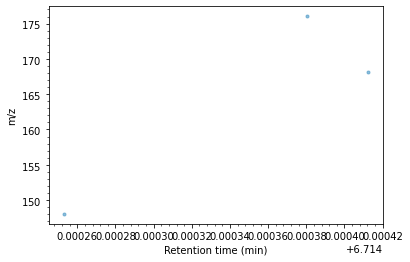

p626 6.71 148.04 -9.32533296988524 None
p1031 6.71 176.04 -9.89260363338719 None
p3577 6.71 168.1 -8.996025354335519 ['C05587' 'C07453' 'C00250']


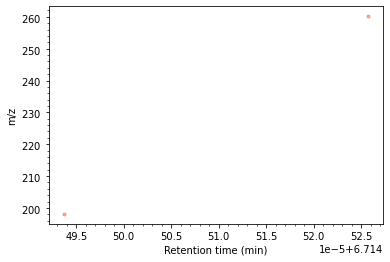

p1341 6.71 198.11 1.4015126914968898 ['C05588']
p2006 6.71 260.19 -1.58775796037401 None


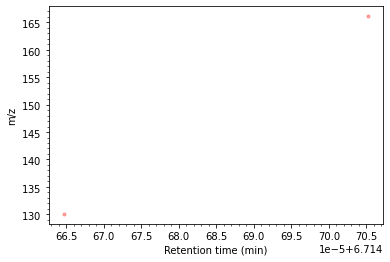

p374 6.71 130.09 -0.125085878785598 ['C05936' 'C00408']
p897 6.71 166.09 0.47705394188279704 ['C05589' 'C00788']


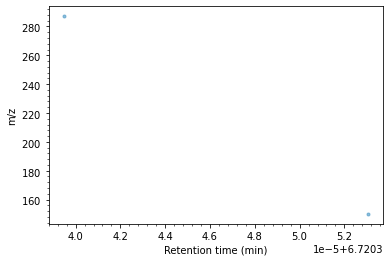

p4109 6.72 287.1 -5.28264613797675 ['C04148' 'C05642']
p668 6.72 150.06 0.353156579871182 ['C00073']


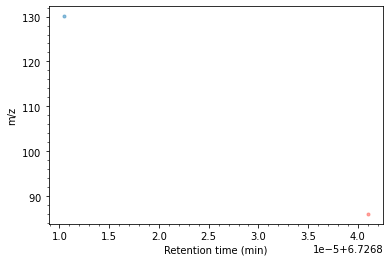

p3317 6.73 130.07 -6.76452846483441 ['C00079' 'CE2172']
p45 6.73 86.06 1.94253743533868 ['C03564']


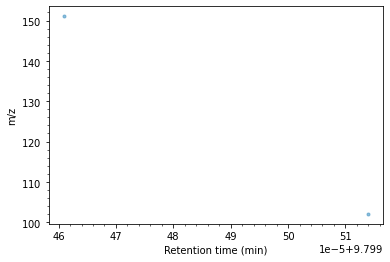

p678 9.8 151.06 -4.4428986783918 ['C00073']
p109 9.8 102.05 -5.730288516100289 ['C05519' 'C00188']


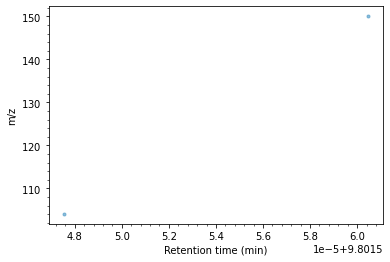

p121 9.8 104.05 -6.016609444999091 ['C00073']
p667 9.8 150.06 -1.65735553998747 ['C00073' 'C00073' 'C00073']


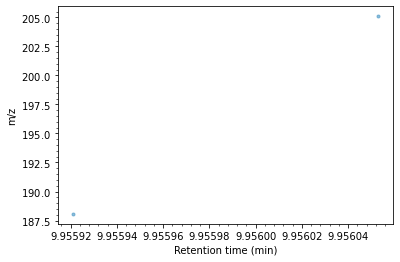

p1189 9.96 188.07 -0.322292259595237 ['C05660' 'C00078']
p1439 9.96 205.1 -0.31578520256663 ['C00078' 'C00525' 'C00078' 'C00078']


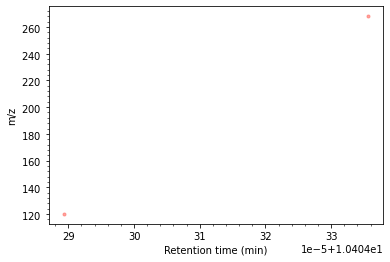

p267 10.4 120.09 -0.018763401044648 None
p2056 10.4 268.01 0.454779381288535 None


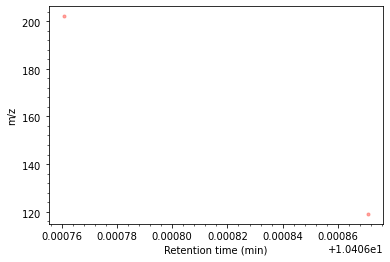

p1388 10.41 202.04 -0.0609272212516885 None
p255 10.41 119.08 -0.0449140739666909 None


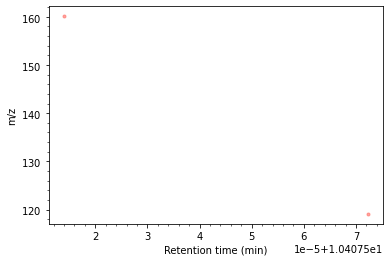

p825 10.41 160.12 -0.0587506162785232 None
p257 10.41 119.09 -0.0334270372725456 ['C00719' 'C00431' 'C00183']


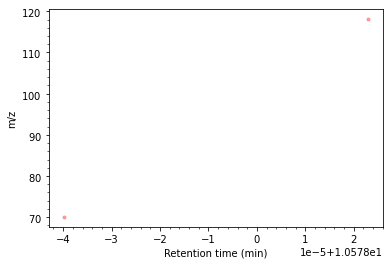

p1 10.58 70.07 -0.06299012971078 ['CE1944' 'C00148']
p239 10.58 118.08 -0.0643126611312113 ['C00719']


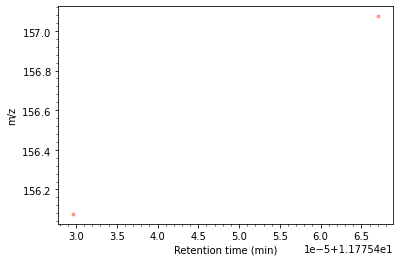

p737 11.78 156.08 1.3576680670986598 ['C00135' 'C00135']
p755 11.78 157.07 -0.9517156456311241 None


In [184]:
for i in range(len(peak_bins.keys())):
    test_bin = peak_bins[list(peak_bins.keys())[i]]
    if len(test_bin)>1:
        get_mz_plot(test_bin)
        for peak in test_bin:
            print(peak.cid,round(peak.rt, 2),round(peak.mz,2), peak.logfc, peak.get_possible_kegg_ids())

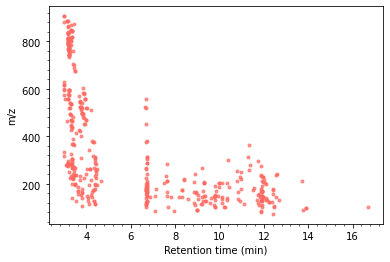

In [165]:
get_significant_mz_plot(peaklist)